pip install seaborn

# Detecting Pneumonia using Convolutional Neural Network (CNN)

## Import The Required Libraries

In [17]:
# basics
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Others
import os
from PIL import Image

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img



## Conduct Simple Exploratory Data Analysis (EDA)

In [3]:
def listdir_nohidden(path):
    return [file for file in os.listdir(path) if not file.startswith('.')]

def num_files_in_directory(path):
    return len([file for file in os.listdir(path) if not file.startswith('.')])

In [4]:
project_path = "E:\MIC_Projects\Pneumonia_Detection"
train_path = project_path + "/chest_xray/train/"
val_path = project_path + "/chest_xray/val/"
test_path = project_path + "/chest_xray/test/"

In [5]:
train_normal_path = train_path + 'NORMAL/'
train_pneumonia_path = train_path + 'PNEUMONIA/'
train_normal_len = num_files_in_directory(train_normal_path)
train_pneumonia_len = num_files_in_directory(train_pneumonia_path)
train_sum_len = train_normal_len + train_pneumonia_len

print("[Train] Number of NORMAL Images: ", train_normal_len)
print("[Train] Number of PNEUMONIA Images: ", train_pneumonia_len)
print("[Train] Number of TOTAL Images: ", train_sum_len)

[Train] Number of NORMAL Images:  1341
[Train] Number of PNEUMONIA Images:  3875
[Train] Number of TOTAL Images:  5216


In [6]:
val_normal_path = val_path + 'NORMAL/'
val_pneumonia_path = val_path + 'PNEUMONIA/'

print("[Validation] Number of NORMAL Images: ", num_files_in_directory(val_normal_path))
print("[Validation] Number of PNEUMONIA Images: ", num_files_in_directory(val_pneumonia_path))
print("[Validation] Number of TOTAL Images: ", num_files_in_directory(val_normal_path) + num_files_in_directory(val_pneumonia_path))

[Validation] Number of NORMAL Images:  8
[Validation] Number of PNEUMONIA Images:  8
[Validation] Number of TOTAL Images:  16


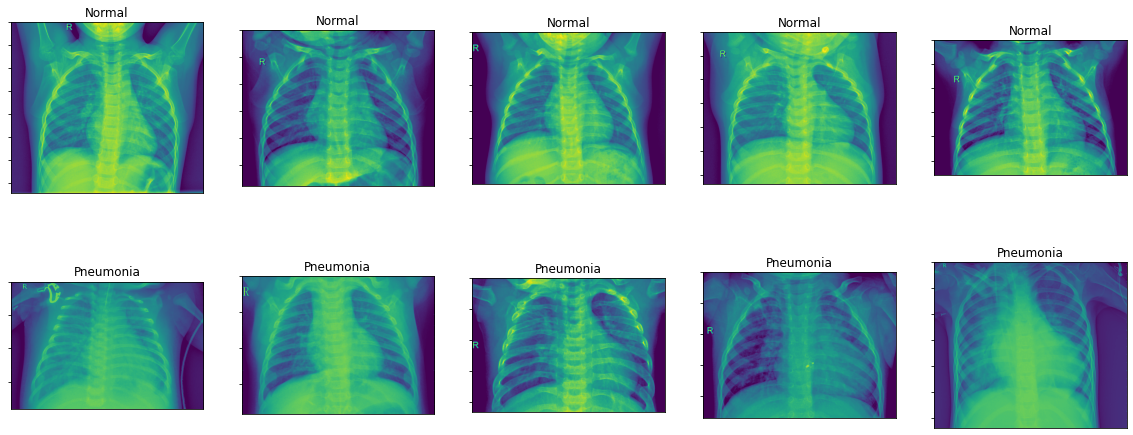

In [7]:
plt.figure(figsize=(20, 8))
num = 5
for index in range(num):
    n_img_title = os.listdir(train_normal_path)[index]
    n_img_path = train_normal_path + n_img_title
    
    plt.subplot(2, num, index+1)
    plt.imshow(Image.open(n_img_path))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    plt.title('Normal')
    ;
    
    p_img_title = os.listdir(train_pneumonia_path)[index]
    p_img_path = train_pneumonia_path + p_img_title
    
    plt.subplot(2, num, index+num+1)
    plt.imshow(Image.open(p_img_path))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    plt.title('Pneumonia')
    ;

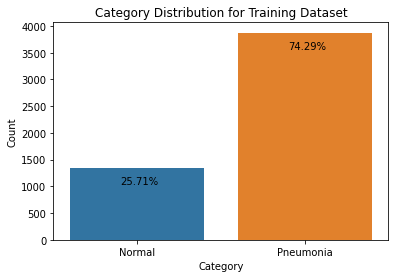

In [12]:
count_list = [['Normal', train_normal_len, train_normal_len/train_sum_len], \
              ['Pneumonia', train_pneumonia_len, train_pneumonia_len/train_sum_len]]
count_df = pd.DataFrame(count_list, columns=['Category', 'Count', 'Percentage'])
values = [train_normal_len, train_pneumonia_len]

ax = sns.barplot(x='Category', y='Count', data=count_df)
ax.set_title("Category Distribution for Training Dataset")

for index, value in enumerate(values):
    plt.text(index-0.1, value-300, str(round(value/sum(values)*100, 2)) + "%");

all images are in different sizes.

In [9]:
for index in range(20):  
    sample_image = train_normal_path + listdir_nohidden(train_normal_path)[index]
    image = Image.open(sample_image)
    width, height = image.size
    print('image', index+1, ':', width, 'x', height)

image 1 : 2090 x 1858
image 2 : 1422 x 1152
image 3 : 1810 x 1434
image 4 : 1618 x 1279
image 5 : 1600 x 1125
image 6 : 1974 x 1306
image 7 : 1528 x 1013
image 8 : 1384 x 1167
image 9 : 1450 x 1144
image 10 : 1468 x 993
image 11 : 1724 x 1581
image 12 : 1346 x 1044
image 13 : 1156 x 1237
image 14 : 1740 x 1453
image 15 : 2138 x 1928
image 16 : 1596 x 1156
image 17 : 2102 x 1974
image 18 : 1542 x 1152
image 19 : 1518 x 1156
image 20 : 1612 x 1133


In [13]:
hyper_dimension = 64
hyper_epochs = 100
hyper_feature_maps = 32
hyper_batch_size = 128

## Training in grayscale instead of RGB
hyper_channels = 1
hyper_mode = 'grayscale'


In [18]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                shear_range=0.2,
                zoom_range = 0.2,
                horizontal_flip=True,
                validation_split=0.4)


val_datagen = ImageDataGenerator(rescale=1.0/255.0) 
test_datagen = ImageDataGenerator(rescale=1.0/255.0) 

train_generator = train_datagen.flow_from_directory(directory = train_path, 
                                                    target_size = (hyper_dimension, hyper_dimension),
                                                    batch_size = hyper_batch_size, 
                                                    color_mode = hyper_mode,
                                                    class_mode = 'binary', 
                                                    seed = 42)
val_generator = val_datagen.flow_from_directory(directory = val_path, 
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)
test_generator = test_datagen.flow_from_directory(directory = test_path, 
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
